In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qmmc.variables import Value, Function
from qmmc.variables import Normal, InvGamma
from qmmc.variables import Model, NormalConjugateSampler

In [3]:
mu_0, sigma_0 = Value(0), Value(2)
shape_0, scale_0 = Value(3), Value(5)

mu_real = Normal(mu_0, sigma_0, name='mu_real')
sigma_real = InvGamma(shape_0, scale_0, name='sigma_real')
X_real = Normal(mu_real, sigma_real, name='X_real', size=1000)

In [4]:
mu = Normal(mu_0, sigma_0, name='mu')
sigma = InvGamma(shape_0, scale_0, name='sigma')
X = Normal(mu, sigma, name='X', value=X_real.value, observed=True)

In [5]:
print mu_real.value, mu.value
print sigma_real.value, sigma.value

0.879826572473 -1.45662174971
1.35361384511 0.860866936881


In [6]:
method = 'Gibbs'
if method == 'Gibbs':
    param_sampler = NormalConjugateSampler(mu, sigma)
    model = Model(variables=[mu, sigma, X], samplers=[param_sampler])
else:
    model = Model(variables=[mu, sigma, X])

In [7]:
print mu_real.value, mu.value
print sigma_real.value, sigma.value

0.879826572473 -1.45662174971
1.35361384511 0.860866936881


In [8]:
model.estimate(1000)

In [9]:
print mu_real.value, mu.value
print sigma_real.value, sigma.value

0.502451150163 0.420334911596
3.8572941527 3.59925216881


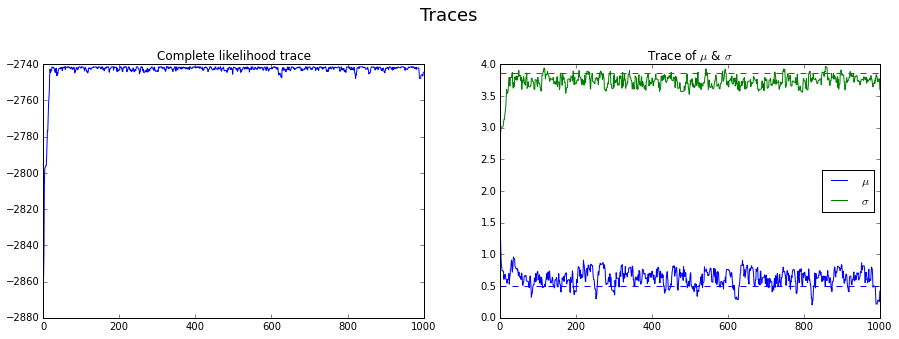

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model.logp_history)
plt.title("Complete likelihood trace")

plt.subplot(2, 2, 2)
if method == 'Gibbs':
    plt.plot(param_sampler.history['mu'])
    plt.plot(param_sampler.history['sigma'])
else:
    plt.plot(model.samplers['mu'].get_history())
    plt.plot(model.samplers['sigma'].get_history())
plt.axhline(mu_real.value, linestyle='--')
plt.axhline(sigma_real.value, color='g', linestyle='--')
plt.legend([r"$\mu$", r"$\sigma$"], loc='best')
plt.title(r"Trace of $\mu$ & $\sigma$")

plt.suptitle(r"Traces", size=18)
plt.show()